<font color='maroon' size=5A face="black body"> Get cleaned data </font>



In [2]:
%store -r dbcopy 
%store -r df_task2
%store -r user_behaviour

db = dbcopy

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.cluster import KMeans

<br/><font color='gold' size=7A face="black body"> Experience Analytics </font><br/><br/>
<p> <font color='maroon' size=6A face="black body"> Sub tasks perform the following tasks </font></p>
    <ul>
        <li>Aggregate, per customer, the following information (treat missing & outliers by replacing by the mean or the mode of the corresponding variable):
            <ul>
                <li>Average TCP retransmission</li>
                <li>Average RTT</li>
                <li>Handset type</li>
                <li>Average throughput</li>
            </ul>
        </li>
        <li>A Compute & list 10 of the top, bottom and most frequent:
            <ul>
                <li>TCP values in the dataset</li>
                <li>RTT values in the dataset.</li>
                <li>Throughput values in the dataset</li>
            </ul>
        </li>
        <li>Compute & report:
            <ul>
                <li>The distribution of the average throughput  per handset type and provide interpretation for your findings</li>
                <li>The average TCP retransmission view per handset type and provide interpretation for your findings</li>
            </ul>
        </li>
        <li>Using the experience metrics above, perform a k-means clustering (where k = 3) to segment users into groups of experiences and provide a brief description of each cluster. (The description must define each group based on your understanding of the data)</li>
    </ul>

In [26]:
def plot_bar(df:pd.DataFrame, x_col:str, y_col:str, title:str, xlabel:str, ylabel:str)->None:
    plt.figure(figsize=(12, 7))
    sns.barplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=10)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.show()

In [4]:
new_netwok_df = dbcopy[['MSISDN/Number','Bearer Id','Handset Type','TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',\
                         'Avg RTT DL (ms)', 'Avg RTT UL (ms)',\
                         'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']]


In [5]:
new_netwok_df['Total TCP Retrans'] = new_netwok_df['TCP DL Retrans. Vol (Bytes)'] +\
    new_netwok_df['TCP UL Retrans. Vol (Bytes)']
new_netwok_df['Total Throughput'] = new_netwok_df['Avg Bearer TP DL (kbps)'] +\
    new_netwok_df['Avg Bearer TP DL (kbps)']

new_netwok_df['Total RTT'] = new_netwok_df['Avg RTT DL (ms)'] + new_netwok_df['Avg RTT UL (ms)']

new_netwok_df.head()

<ipython-input-5-85a76af12d99>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_netwok_df['Total TCP Retrans'] = new_netwok_df['TCP DL Retrans. Vol (Bytes)'] +\
<ipython-input-5-85a76af12d99>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_netwok_df['Total Throughput'] = new_netwok_df['Avg Bearer TP DL (kbps)'] +\
<ipython-input-5-85a76af12d99>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

,MSISDN/Number,Bearer Id,Handset Type,TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),Total TCP Retrans,Total Throughput,Total RTT
0,3.366496e+10,1.311448e+19,Samsung Galaxy A5 Sm-A520F,2.080991e+07,759658.664811,42.000000,5.000000,23.0,44.0,2.156957e+07,46.0,47.000000
1,3.368185e+10,1.311448e+19,Samsung Galaxy J5 (Sm-J530),2.080991e+07,759658.664811,65.000000,5.000000,16.0,26.0,2.156957e+07,32.0,70.000000
2,3.376063e+10,1.311448e+19,Samsung Galaxy A8 (2018),2.080991e+07,759658.664811,109.795706,17.662883,6.0,9.0,2.156957e+07,12.0,127.458589
3,3.375034e+10,1.311448e+19,undefined,2.080991e+07,759658.664811,109.795706,17.662883,44.0,44.0,2.156957e+07,88.0,127.458589
4,3.369980e+10,1.311448e+19,Samsung Sm-G390F,2.080991e+07,759658.664811,109.795706,17.662883,6.0,9.0,2.156957e+07,12.0,127.458589


In [19]:
aggregate = {'Handset Type':'first','Total TCP Retrans':'sum', 'Total Throughput':'sum', 'Total RTT':'sum'}
columns = ['MSISDN/Number','Bearer Id','Handset Type', 'Total TCP Retrans', 'Total Throughput', 'Total RTT']
network_per_user_df = new_netwok_df[columns].groupby('MSISDN/Number').agg(aggregate).reset_index()
network_per_user_df.head()

,MSISDN/Number,Handset Type,Total TCP Retrans,Total Throughput,Total RTT
0,3.360100e+10,Huawei P20 Lite Huawei Nova 3E,2.156957e+07,74.0,46.000000
1,3.360100e+10,Apple iPhone 7 (A1778),2.156957e+07,96.0,31.000000
2,3.360100e+10,undefined,2.156957e+07,96.0,127.458589
3,3.360101e+10,Apple iPhone 5S (A1457),7.607247e+05,408.0,84.000000
4,3.360101e+10,Apple iPhone Se (A1723),3.094040e+07,80790.0,119.000000


In [20]:
# top 5
network_per_user_df.sort_values(by='Total TCP Retrans', ascending=False)[:5]

,MSISDN/Number,Handset Type,Total TCP Retrans,Total Throughput,Total RTT
66616,3.366773e+10,Huawei B528S-23A,8.354209e+09,624632.0,703.0
33988,3.365908e+10,Huawei B528S-23A,7.941860e+09,328898.0,396.0
42210,3.366098e+10,Huawei B528S-23A,7.374899e+09,416266.0,417.0
94334,3.376128e+10,Huawei B528S-23A,6.043978e+09,198702.0,351.0
97859,3.376264e+10,Huawei B528S-23A,5.879989e+09,906978.0,2860.0


In [21]:
# Bottom 5
network_per_user_df.sort_values(by='Total TCP Retrans', ascending=True)[:5]

,MSISDN/Number,Handset Type,Total TCP Retrans,Total Throughput,Total RTT
23369,3.365013e+10,Apple iPhone 5S (A1457),97.0,60460.0,48.0
6326,3.361478e+10,Huawei Ascend Mate7,128.0,16996.0,64.0
96625,3.376206e+10,Apple iPhone 8 (A1905),129.0,63080.0,41.0
13487,3.362636e+10,Apple iPhone 7 (A1778),134.0,20256.0,40.0
2162,3.360783e+10,Apple iPhone 5C (A1529),143.0,32484.0,32.0


In [22]:
# most frequent
network_per_user_df['Total TCP Retrans'].value_counts().head(5)

2.156957e+07    47122
4.313915e+07     7468
6.470872e+07     1032
2.081121e+07      363
8.627829e+07      252
Name: Total TCP Retrans, dtype: int64

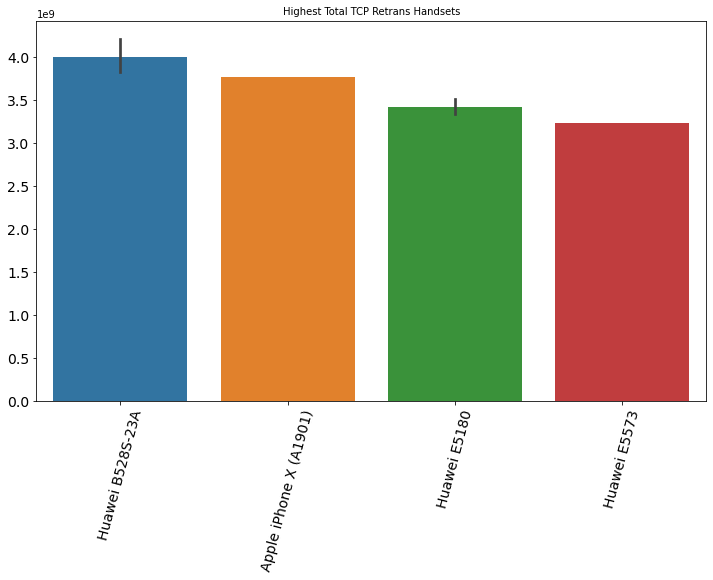

In [27]:
result = network_per_user_df.sort_values(by='Total TCP Retrans', ascending=False)[:100]
plot_bar(result, result['Handset Type'], result['Total TCP Retrans'], 'Highest Total TCP Retrans Handsets','','')

In [28]:
handset= network_per_user_df['Handset Type'].unique()

# catagory = {}
# for index, each in enumerate(handset.tolist()):
#     catagory[each] = index

net_cluster_df = network_per_user_df.copy()
net_cluster_df.drop('Handset Type', axis=1, inplace=True)
net_cluster_df = net_cluster_df.set_index('MSISDN/Number')

net_cluster_df.head()

,Total TCP Retrans,Total Throughput,Total RTT
MSISDN/Number,,,
3.360100e+10,2.156957e+07,74.0,46.000000
3.360100e+10,2.156957e+07,96.0,31.000000
3.360100e+10,2.156957e+07,96.0,127.458589
3.360101e+10,7.607247e+05,408.0,84.000000
3.360101e+10,3.094040e+07,80790.0,119.000000


In [29]:
min_max_scaler = preprocessing.MinMaxScaler()
network_values = net_cluster_df.values
scalled_values = min_max_scaler.fit_transform(network_values)
df_network_normalized = pd.DataFrame(data=scalled_values, columns=df_task2.columns)

kmeans = KMeans(n_clusters=3).fit(df_normalized)

NameError: name 'df_normalized' is not defined